In [1]:
import sys
sys.path.append('/root/code/LLM/LSTM_from_wzw')
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import math
from utils import *
import argparse
from matplotlib.legend_handler import HandlerLine2D

In [2]:
import numpy as np
working_dir_LSTM=r'/root/code/LLM/LSTM_from_wzw/result/LSTM_3x_to_x_for_paper'
acc_test_unmask_his_mean_all=[]
acc_test_unmask_his_std_all=[]

for N in range(200,850,50):
    acc_train_unmask_his_all=[]
    acc_test_unmask_his_all=[]
    for seed in range(1, 11):
        working_dir = f'{working_dir_LSTM}/3x_to_x-seed_{seed}-N_{N}'

        acc_epoch_his = np.load(f'{working_dir}/loss/acc_epoch_his.npy')

        acc_train_unmask_his = np.load(f'{working_dir}/loss/acc_train_unmask_his.npy')
        acc_test_unmask_his = np.load(f'{working_dir}/loss/acc_test_unmask_his.npy')
        acc_train_unmask_his_all.append(np.max(acc_train_unmask_his))
        acc_test_unmask_his_all.append(np.max(acc_test_unmask_his))


    # acc_train_unmask_his_all=np.array(acc_train_unmask_his_all)
    
    # #calculate mean and std
    acc_train_unmask_his_all=np.array(acc_train_unmask_his_all)
    acc_test_unmask_his_all=np.array(acc_test_unmask_his_all)

    # acc_train_unmask_his_mean=np.mean(acc_train_unmask_his_all)
    acc_test_unmask_his_mean=np.mean(acc_test_unmask_his_all)
    # acc_train_unmask_his_std=np.std(acc_train_unmask_his_all)
    acc_test_unmask_his_std=np.std(acc_test_unmask_his_all)
    acc_test_unmask_his_mean_all.append(acc_test_unmask_his_mean)
    acc_test_unmask_his_std_all.append(acc_test_unmask_his_std)













In [3]:
working_dir_LSTM=r'/root/code/LLM/LSTM_from_wzw/result/DNN_3x_to_x_for_paper'
acc_test_unmask_his_mean_all_DNN=[]
acc_test_unmask_his_std_all_DNN=[]

for N in range(200,850,50):
    acc_train_unmask_his_all=[]
    acc_test_unmask_his_all=[]
    for seed in [1,6]:
        working_dir = f'{working_dir_LSTM}/3x_to_x-seed_{seed}-N_{N}'

        acc_epoch_his = np.load(f'{working_dir}/loss/acc_epoch_his.npy')

        acc_train_unmask_his = np.load(f'{working_dir}/loss/acc_train_unmask_his.npy')
        acc_test_unmask_his = np.load(f'{working_dir}/loss/acc_test_unmask_his.npy')
        acc_train_unmask_his_all.append(np.max(acc_train_unmask_his))
        acc_test_unmask_his_all.append(np.max(acc_test_unmask_his))


    # acc_train_unmask_his_all=np.array(acc_train_unmask_his_all)
    
    # #calculate mean and std
    acc_train_unmask_his_all=np.array(acc_train_unmask_his_all)
    acc_test_unmask_his_all=np.array(acc_test_unmask_his_all)

    # acc_train_unmask_his_mean=np.mean(acc_train_unmask_his_all)
    acc_test_unmask_his_mean=np.mean(acc_test_unmask_his_all)
    # acc_train_unmask_his_std=np.std(acc_train_unmask_his_all)
    acc_test_unmask_his_std=np.std(acc_test_unmask_his_all)
    acc_test_unmask_his_mean_all_DNN.append(acc_test_unmask_his_mean)
    acc_test_unmask_his_std_all_DNN.append(acc_test_unmask_his_std)

In [4]:
acc_test_unmask_his_mean_all_GPT=np.load('/root/code/LLM/LSTM_from_wzw/result/mean.npy')
acc_test_unmask_his_std_all_GPT=np.load('/root/code/LLM/LSTM_from_wzw/result/std.npy')

In [5]:
acc_test_unmask_his_mean_all_GPT=np.array(acc_test_unmask_his_mean_all_GPT)
acc_test_unmask_his_std_all_GPT=np.array(acc_test_unmask_his_std_all_GPT)
acc_test_unmask_his_mean_all_DNN=np.array(acc_test_unmask_his_mean_all_DNN)
acc_test_unmask_his_std_all_DNN=np.array(acc_test_unmask_his_std_all_DNN)
acc_test_unmask_his_mean_all=np.array(acc_test_unmask_his_mean_all)
acc_test_unmask_his_std_all=np.array(acc_test_unmask_his_std_all)

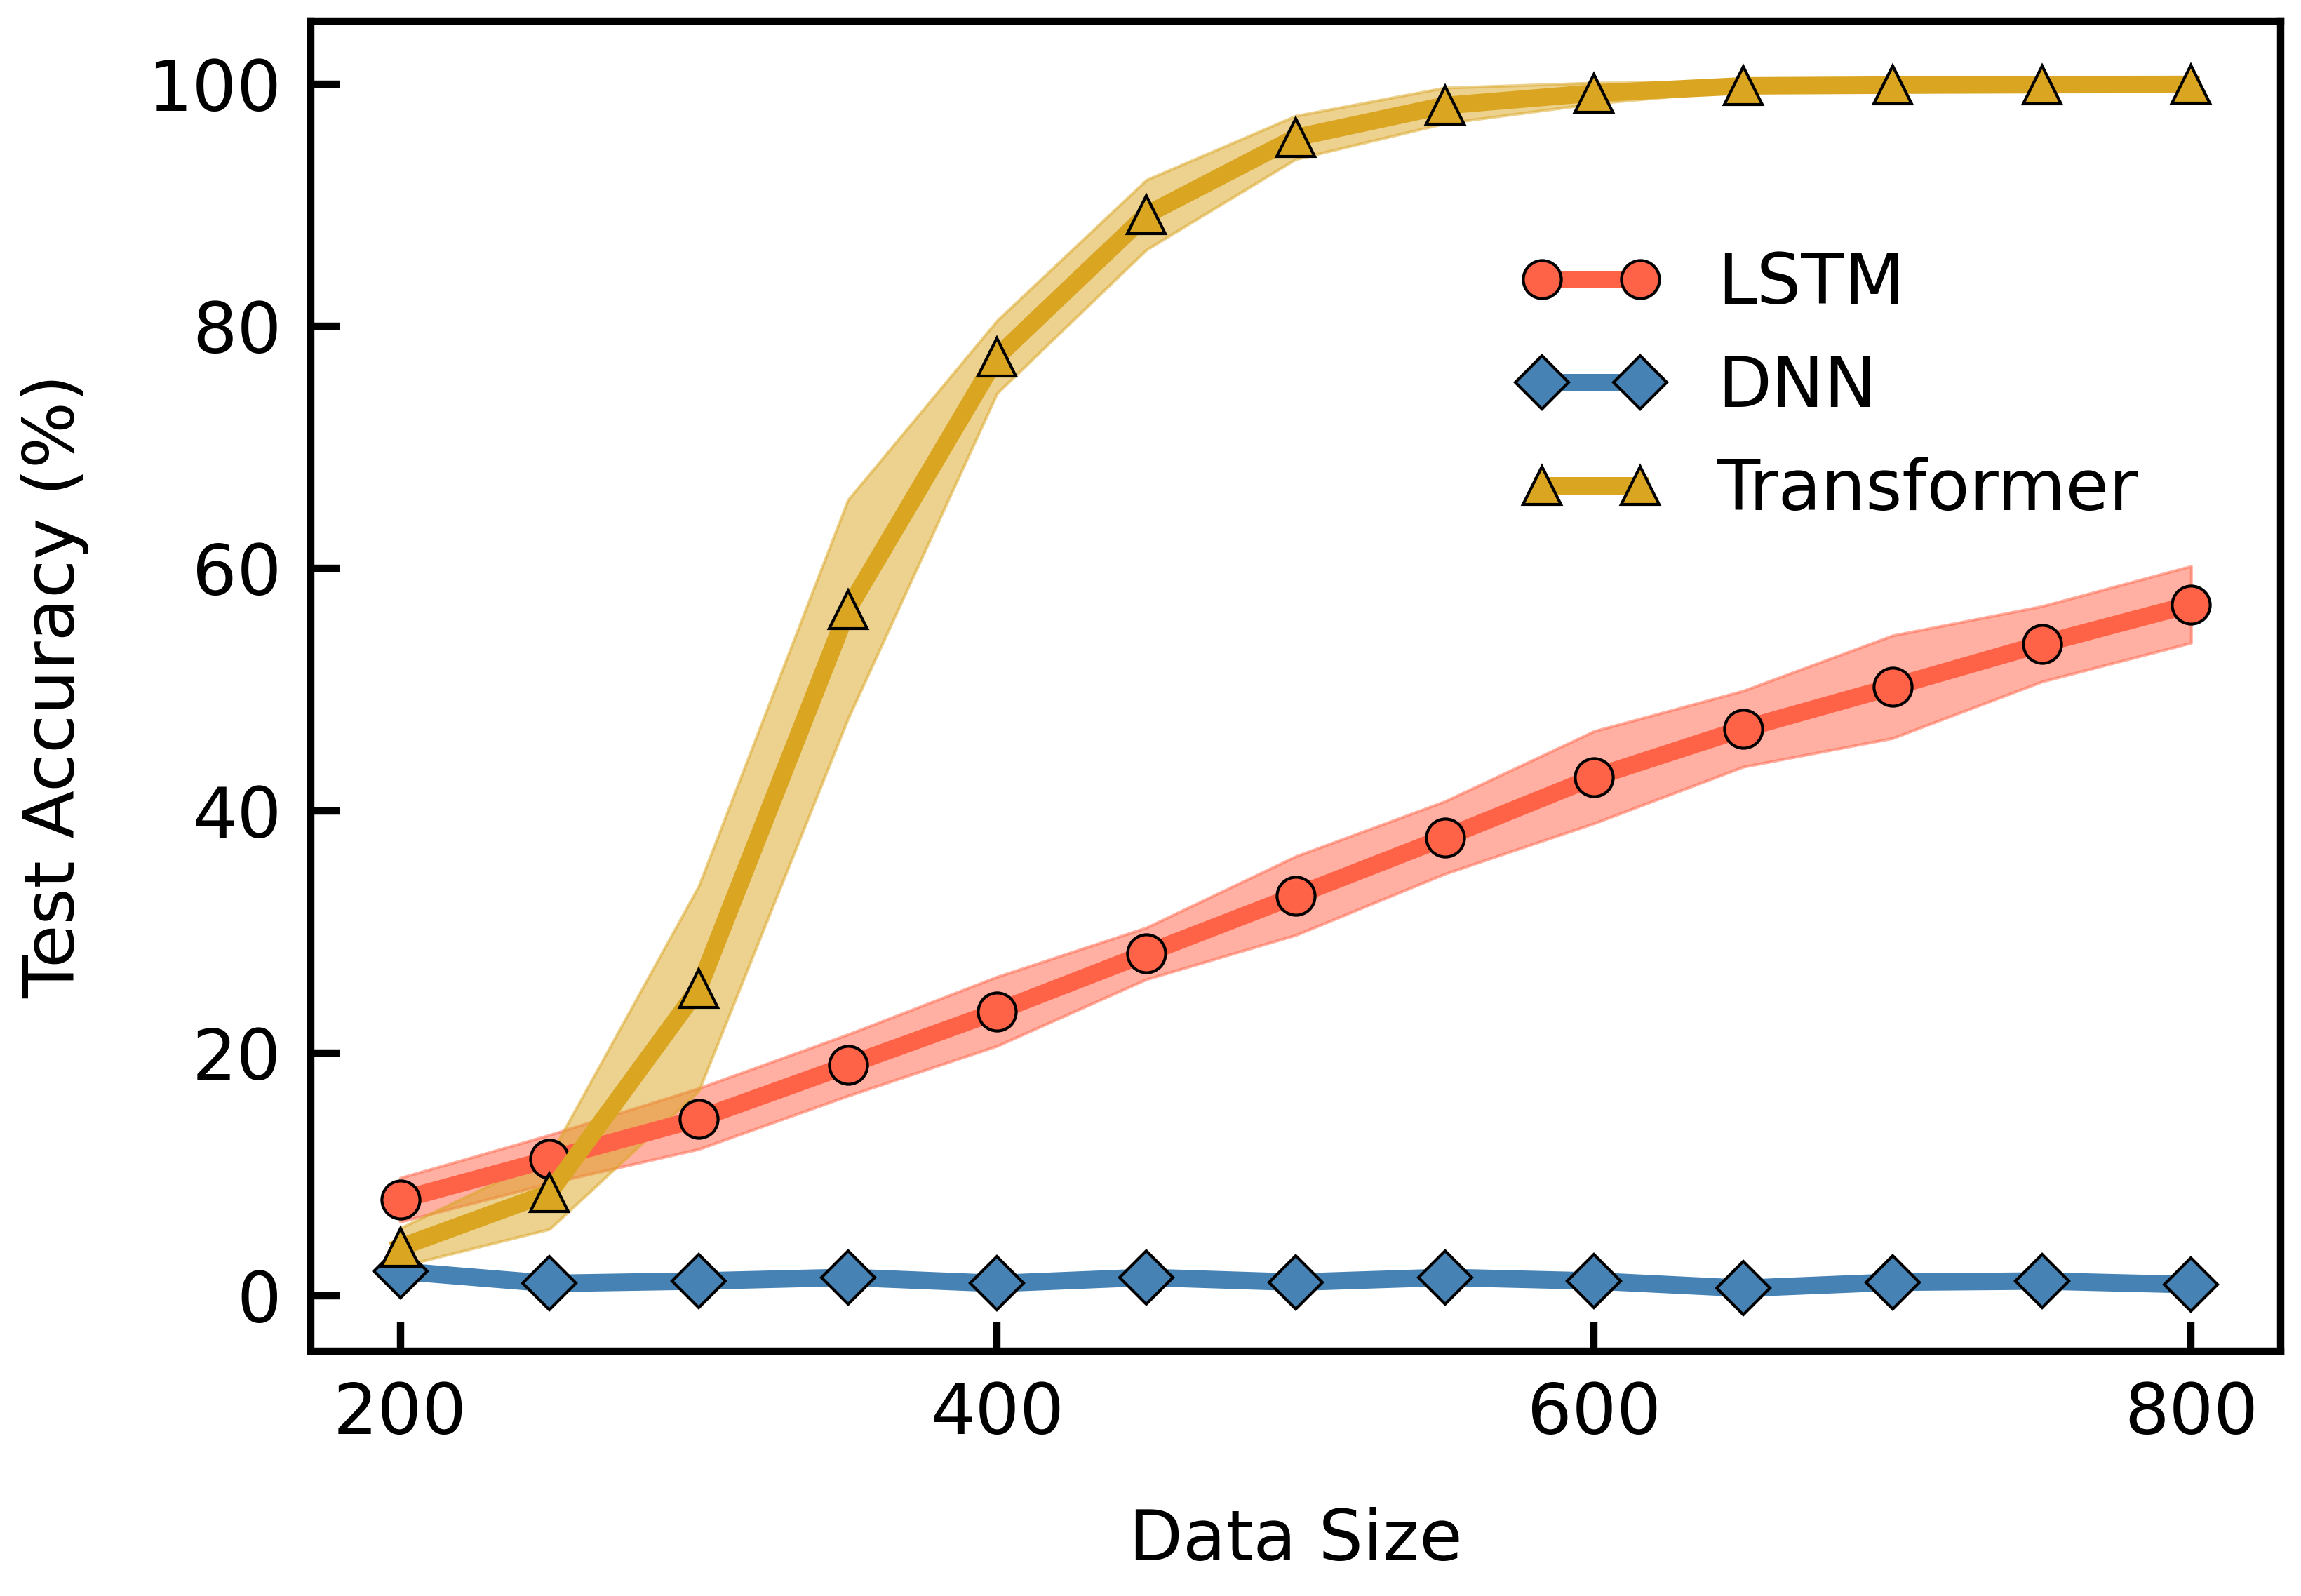

In [6]:
fig = plt.figure(figsize=(12, 8), dpi=300)
format_settings(wspace=0.4, hspace=0.6, bottom=0.16, fs=24, lw=6, ms=12.5, axlw=2.5, major_tick_len=10)

ax = plt.gca()
handler_map = {}
color_list = ['tomato', 'steelblue', 'goldenrod', 'skyblue']
# color_list = ['tomato', 'steelblue', 'lightsalmon', 'skyblue']
l1, = ax.plot(range(200,850,50), acc_test_unmask_his_mean_all, label=f'LSTM',  color=color_list[0], 
        marker = 'o', markersize=13, markeredgewidth=1, markeredgecolor='black', zorder=6)
ax.fill_between(range(200,850,50), acc_test_unmask_his_mean_all+acc_test_unmask_his_std_all,acc_test_unmask_his_mean_all-acc_test_unmask_his_std_all, alpha=0.5, color=color_list[0])
l2, = ax.plot(range(200,850,50), acc_test_unmask_his_mean_all_DNN, label=f'DNN', color=color_list[1], 
        marker = 'D', markersize=13, markeredgewidth=1, markeredgecolor='black', zorder=5)
ax.fill_between(range(200,850,50), acc_test_unmask_his_mean_all_DNN+acc_test_unmask_his_std_all_DNN,acc_test_unmask_his_mean_all_DNN-acc_test_unmask_his_std_all_DNN, alpha=0.5, color=color_list[1])


l3, = ax.plot(range(200,850,50), acc_test_unmask_his_mean_all_GPT, label=f'Transformer',  color=color_list[2], 
                marker = '^', markersize=13, markeredgewidth=1, markeredgecolor='black', zorder=6)      
ax.fill_between(range(200,850,50), acc_test_unmask_his_mean_all_GPT+acc_test_unmask_his_std_all_GPT,acc_test_unmask_his_mean_all_GPT-acc_test_unmask_his_std_all_GPT, alpha=0.5, color=color_list[2])
handler_map[l1] = HandlerLine2D(numpoints=2)
handler_map[l2] = HandlerLine2D(numpoints=2)
handler_map[l3] = HandlerLine2D(numpoints=2)
handles = [l1, l2, l3]

# 如果存在mask的数据，则绘制mask数据的acc
# if plot_mask:
#         l3, = ax.plot(acc_epoch_his, acc_train_mask_his, label=f'train (mask)', lw=2, color=color_list[2], 
#                 marker = '^', markersize=9, markeredgewidth=1, markeredgecolor='black', zorder=6)        
#         l4, = ax.plot(acc_epoch_his, acc_test_mask_his, label=f'test  (mask)', color=color_list[3], 
#                 marker = '^', markersize=13, markeredgewidth=1, markeredgecolor='black', zorder=5)
        
#         handler_map[l3] = HandlerLine2D(numpoints=2)
#         handler_map[l4] = HandlerLine2D(numpoints=2)
#         handles.extend([l3, l4])

ax.set_xlabel('Data Size', labelpad=20, fontsize=24)
ax.set_ylabel('Test Accuracy (%)', labelpad=20, fontsize=24)

ax.set_xticks([200,400,600,800])
ax.set_xticklabels([200,400,600,800])
ax.set_yticks([0,0.2,0.4,0.6, 0.8, 1])
ax.set_yticklabels([0,20,40,60, 80, 100])

plt.legend(handler_map=handler_map, handles=handles, loc=(0.6, 0.6))
# plt.tight_layout()

plt.savefig(f'/root/code/LLM/plot_for_anchor_func/simple_task.png')
plt.savefig(f'/root/code/LLM/plot_for_anchor_func/simple_task.pdf')

In [7]:
import numpy as np
working_dir_LSTM=r'/root/code/LLM/LSTM_from_wzw/result/DNN_3x_to_x_for_paper'
acc_test_unmask_his_mean_all_DNN=[]
acc_test_unmask_his_std_all_DNN=[]


for N in range(200,1000,200):
    acc_train_unmask_his_all=[]
    acc_test_unmask_his_all=[]
    for seed in [1,6]:
        working_dir = f'{working_dir_LSTM}/3x_to_x-seed_{seed}-N_{N}'

        acc_epoch_his = np.load(f'{working_dir}/loss/acc_epoch_his.npy')

        acc_train_unmask_his = np.load(f'{working_dir}/loss/acc_train_unmask_his.npy')
        acc_test_unmask_his = np.load(f'{working_dir}/loss/acc_test_unmask_his.npy')
        acc_train_unmask_his_all.append(np.max(acc_train_unmask_his))
        acc_test_unmask_his_all.append(np.max(acc_test_unmask_his))


    # acc_train_unmask_his_all=np.array(acc_train_unmask_his_all)
    
    # #calculate mean and std
    acc_train_unmask_his_all=np.array(acc_train_unmask_his_all)
    acc_test_unmask_his_all=np.array(acc_test_unmask_his_all)

    # acc_train_unmask_his_mean=np.mean(acc_train_unmask_his_all)
    acc_test_unmask_his_mean=np.mean(acc_test_unmask_his_all)
    # acc_train_unmask_his_std=np.std(acc_train_unmask_his_all)
    acc_test_unmask_his_std=np.std(acc_test_unmask_his_all)
    acc_test_unmask_his_mean_all_DNN.append(acc_test_unmask_his_mean)
    acc_test_unmask_his_std_all_DNN.append(acc_test_unmask_his_std)

acc_test_unmask_his_mean_all_DNN_2=np.load('/root/code/LLM/LSTM_from_wzw/result/mean_1000_2800_DNN.npy')
acc_test_unmask_his_std_all_DNN_2=np.load('/root/code/LLM/LSTM_from_wzw/result/std_1000_2800_DNN.npy')

acc_test_unmask_his_mean_all_DNN.extend(acc_test_unmask_his_mean_all_DNN_2)
acc_test_unmask_his_std_all_DNN.extend(acc_test_unmask_his_std_all_DNN_2)

acc_test_unmask_his_mean_all_DNN.extend([0.0122])


acc_test_unmask_his_std_all_DNN.extend([0.0034])

In [8]:
working_dir_LSTM=r'/root/code/LLM/LSTM_from_wzw/result/LSTM_3x_to_x_for_paper'
acc_test_unmask_his_mean_all_LSTM=[]
acc_test_unmask_his_std_all_LSTM=[]

for N in range(200,1000,200):
    acc_train_unmask_his_all=[]
    acc_test_unmask_his_all=[]
    for seed in range(1, 11):
        working_dir = f'{working_dir_LSTM}/3x_to_x-seed_{seed}-N_{N}'

        acc_epoch_his = np.load(f'{working_dir}/loss/acc_epoch_his.npy')

        acc_train_unmask_his = np.load(f'{working_dir}/loss/acc_train_unmask_his.npy')
        acc_test_unmask_his = np.load(f'{working_dir}/loss/acc_test_unmask_his.npy')
        acc_train_unmask_his_all.append(np.max(acc_train_unmask_his))
        acc_test_unmask_his_all.append(np.max(acc_test_unmask_his))


    # acc_train_unmask_his_all=np.array(acc_train_unmask_his_all)
    
    # #calculate mean and std
    acc_train_unmask_his_all=np.array(acc_train_unmask_his_all)
    acc_test_unmask_his_all=np.array(acc_test_unmask_his_all)

    # acc_train_unmask_his_mean=np.mean(acc_train_unmask_his_all)
    acc_test_unmask_his_mean=np.mean(acc_test_unmask_his_all)
    # acc_train_unmask_his_std=np.std(acc_train_unmask_his_all)
    acc_test_unmask_his_std=np.std(acc_test_unmask_his_all)
    acc_test_unmask_his_mean_all_LSTM.append(acc_test_unmask_his_mean)
    acc_test_unmask_his_std_all_LSTM.append(acc_test_unmask_his_std)

for N in range(1000,2800,200):
    acc_train_unmask_his_all=[]
    acc_test_unmask_his_all=[]
    for seed in range(1, 6):
        working_dir = f'{working_dir_LSTM}/3x_to_x-seed_{seed}-N_{N}'

        acc_epoch_his = np.load(f'{working_dir}/loss/acc_epoch_his.npy')

        acc_train_unmask_his = np.load(f'{working_dir}/loss/acc_train_unmask_his.npy')
        acc_test_unmask_his = np.load(f'{working_dir}/loss/acc_test_unmask_his.npy')
        acc_train_unmask_his_all.append(np.max(acc_train_unmask_his))
        acc_test_unmask_his_all.append(np.max(acc_test_unmask_his))


    # acc_train_unmask_his_all=np.array(acc_train_unmask_his_all)
    
    # #calculate mean and std
    acc_train_unmask_his_all=np.array(acc_train_unmask_his_all)
    acc_test_unmask_his_all=np.array(acc_test_unmask_his_all)

    # acc_train_unmask_his_mean=np.mean(acc_train_unmask_his_all)
    acc_test_unmask_his_mean=np.mean(acc_test_unmask_his_all)
    # acc_train_unmask_his_std=np.std(acc_train_unmask_his_all)
    acc_test_unmask_his_std=np.std(acc_test_unmask_his_all)
    acc_test_unmask_his_mean_all_LSTM.append(acc_test_unmask_his_mean)
    acc_test_unmask_his_std_all_LSTM.append(acc_test_unmask_his_std)

In [9]:

acc_test_unmask_his_mean_all_GPT=np.load('/root/code/LLM/LSTM_from_wzw/result/mean.npy')
acc_test_unmask_his_std_all_GPT=np.load('/root/code/LLM/LSTM_from_wzw/result/std.npy')
acc_test_unmask_his_mean_all_GPT_2=np.load('/root/code/LLM/LSTM_from_wzw/result/mean_1000_2800.npy')
acc_test_unmask_his_std_all_GPT_2=np.load('/root/code/LLM/LSTM_from_wzw/result/std_1000_2800.npy')

acc_test_unmask_his_mean_all_GPT=np.concatenate((acc_test_unmask_his_mean_all_GPT[::4], acc_test_unmask_his_mean_all_GPT_2))
acc_test_unmask_his_std_all_GPT=np.concatenate((acc_test_unmask_his_std_all_GPT[::4], acc_test_unmask_his_std_all_GPT_2))


In [10]:


acc_test_unmask_his_mean_all_DNN=np.array(acc_test_unmask_his_mean_all_DNN)
acc_test_unmask_his_std_all_DNN=np.array(acc_test_unmask_his_std_all_DNN)
acc_test_unmask_his_mean_all_LSTM=np.array(acc_test_unmask_his_mean_all_LSTM)
acc_test_unmask_his_std_all_LSTM=np.array(acc_test_unmask_his_std_all_LSTM)
acc_test_unmask_his_mean_all_GPT=np.array(acc_test_unmask_his_mean_all_GPT)
acc_test_unmask_his_std_all_GPT=np.array(acc_test_unmask_his_std_all_GPT)


In [11]:
print(acc_test_unmask_his_mean_all_DNN.shape)
print(acc_test_unmask_his_mean_all_LSTM.shape)
print(acc_test_unmask_his_mean_all_GPT.shape)

(13,)
(13,)
(13,)


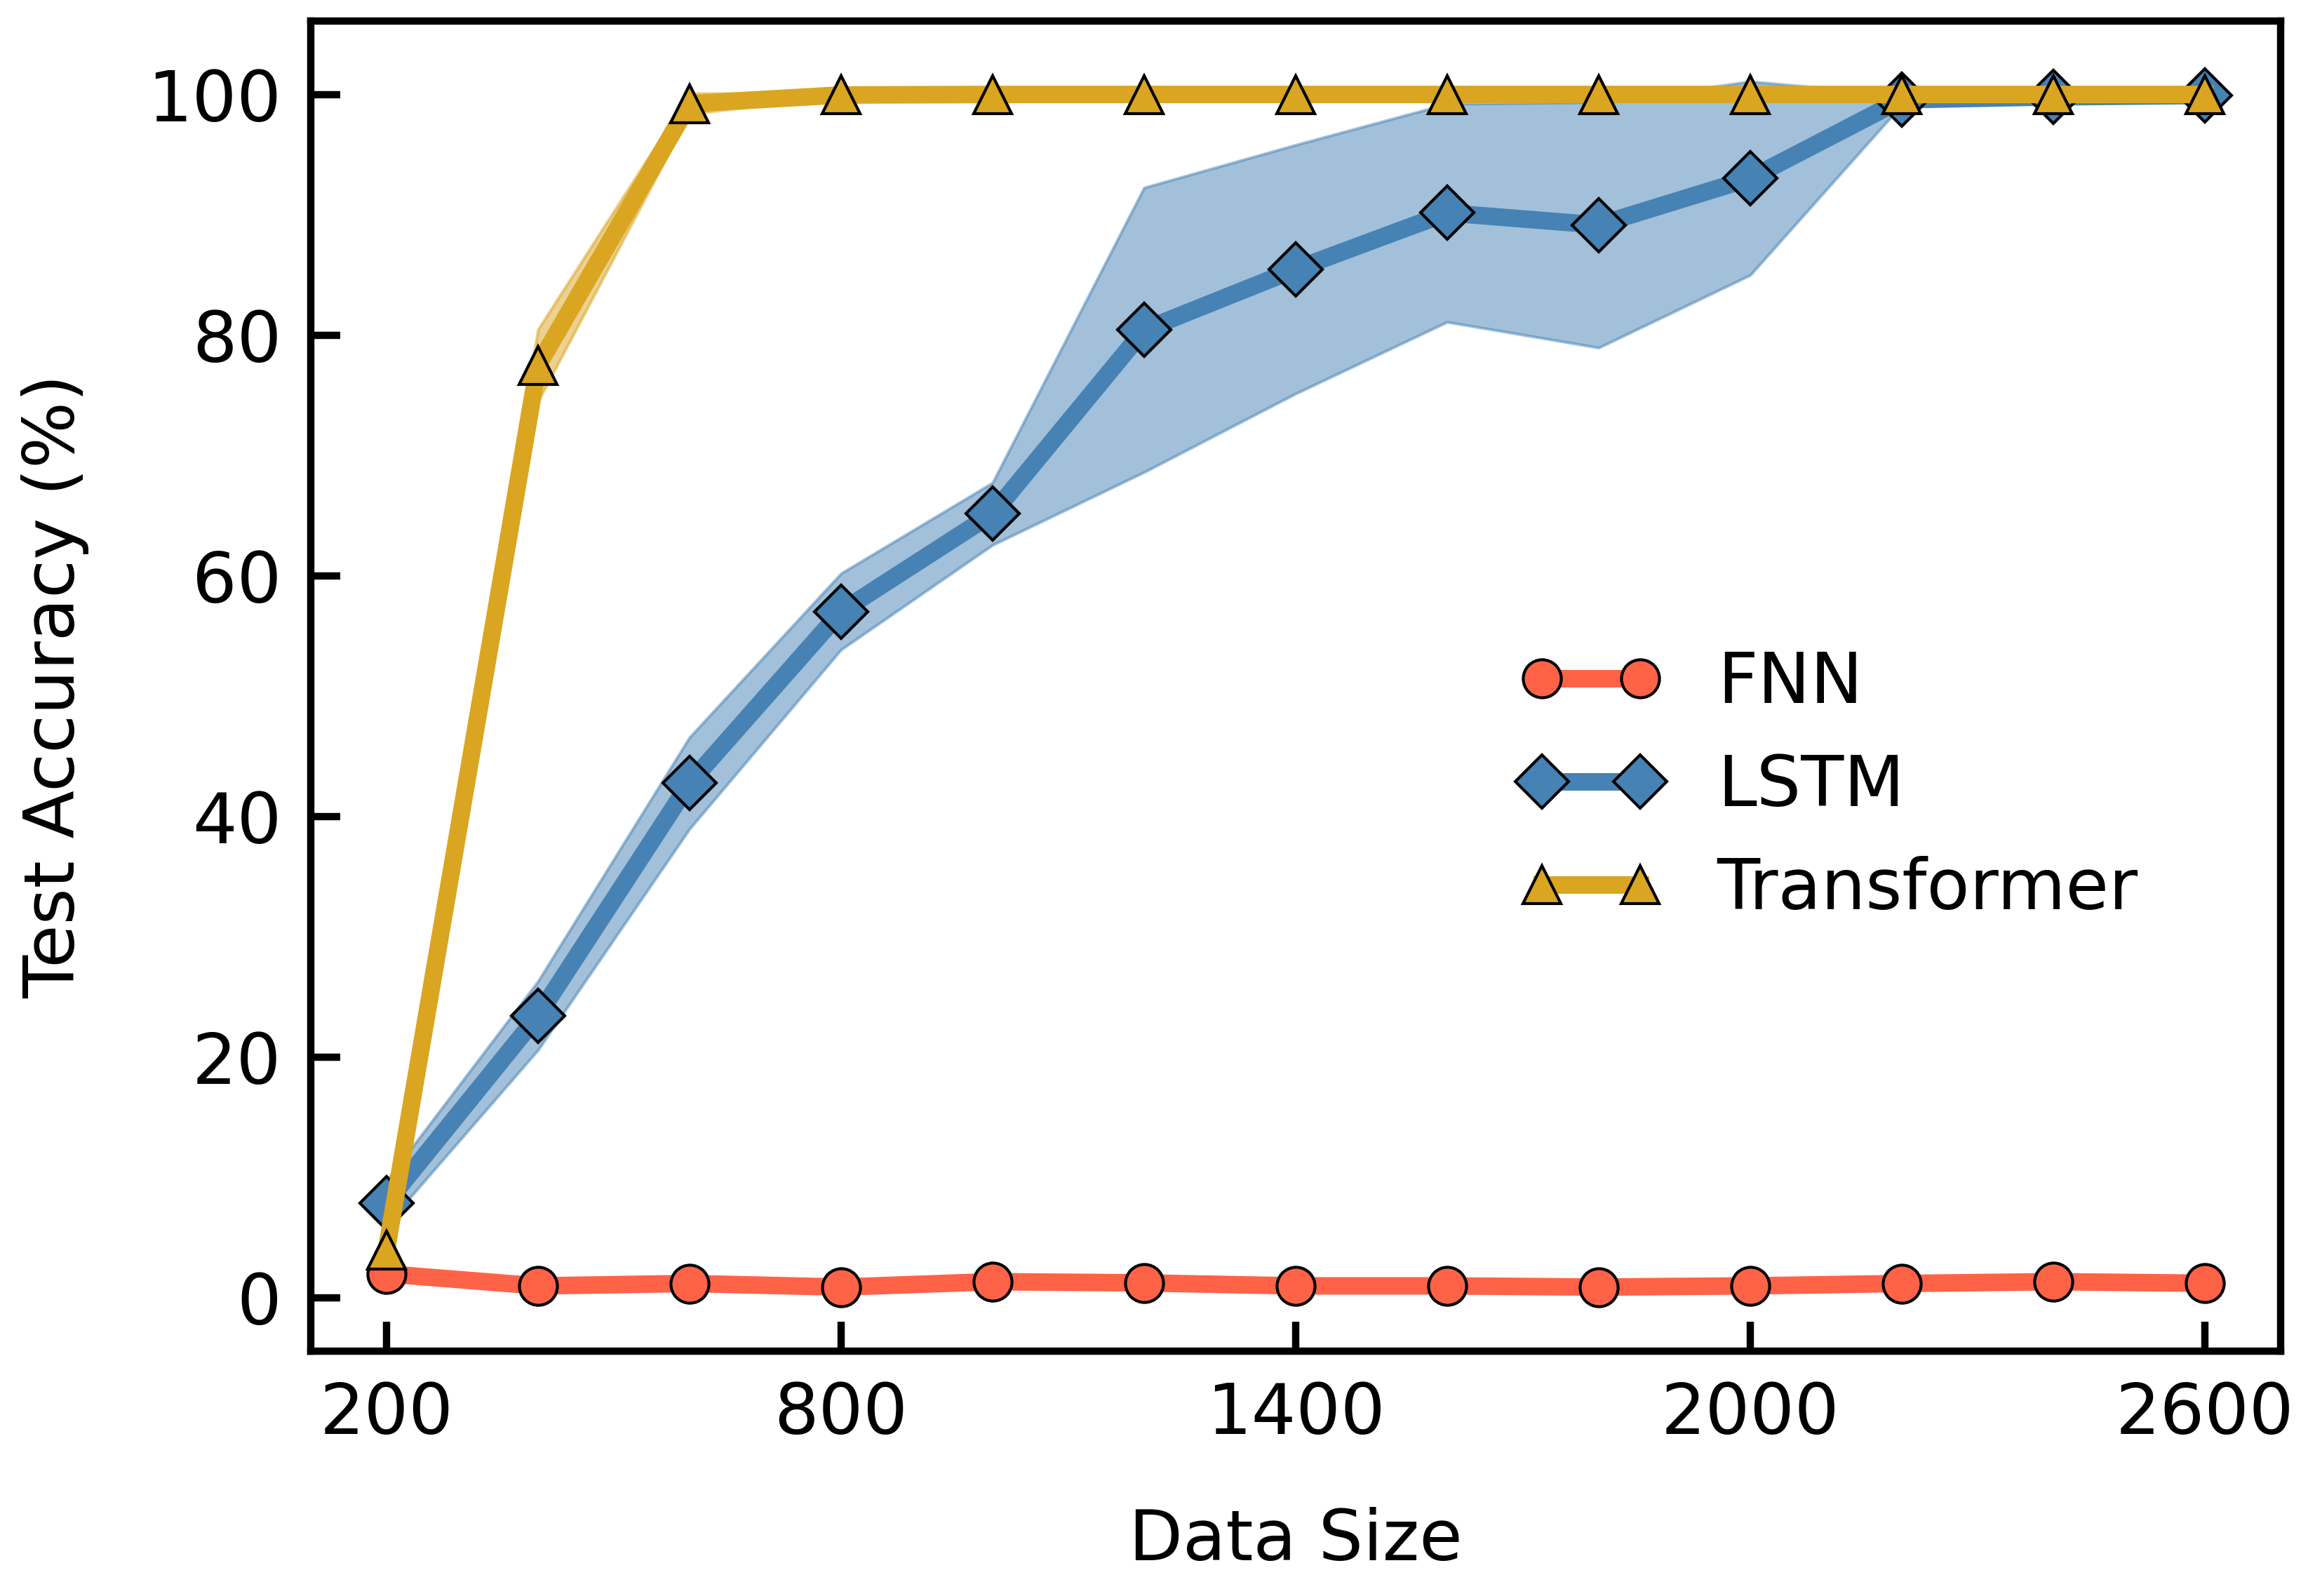

In [13]:
fig = plt.figure(figsize=(12, 8), dpi=300)
format_settings(wspace=0.4, hspace=0.6, bottom=0.16, fs=24, lw=6, ms=12.5, axlw=2.5, major_tick_len=10)

ax = plt.gca()
handler_map = {}
color_list = ['tomato', 'steelblue', 'goldenrod', 'skyblue']
# color_list = ['tomato', 'steelblue', 'lightsalmon', 'skyblue']
l1, = ax.plot(range(200,2800,200), acc_test_unmask_his_mean_all_DNN, label=f'FNN',  color=color_list[0], 
        marker = 'o', markersize=13, markeredgewidth=1, markeredgecolor='black', zorder=6)
ax.fill_between(range(200,2800,200), acc_test_unmask_his_mean_all_DNN+acc_test_unmask_his_std_all_DNN,acc_test_unmask_his_mean_all_DNN-acc_test_unmask_his_std_all_DNN, alpha=0.5, color=color_list[0])
l2, = ax.plot(range(200,2800,200), acc_test_unmask_his_mean_all_LSTM, label=f'LSTM',  color=color_list[1], 
        marker = 'D', markersize=13, markeredgewidth=1, markeredgecolor='black', zorder=6)
ax.fill_between(range(200,2800,200), acc_test_unmask_his_mean_all_LSTM+acc_test_unmask_his_std_all_LSTM,acc_test_unmask_his_mean_all_LSTM-acc_test_unmask_his_std_all_LSTM, alpha=0.5, color=color_list[1])

l3, = ax.plot(range(200,2800,200), acc_test_unmask_his_mean_all_GPT, label=f'Transformer',  color=color_list[2], 
        marker = '^', markersize=13, markeredgewidth=1, markeredgecolor='black', zorder=6)
ax.fill_between(range(200,2800,200), acc_test_unmask_his_mean_all_GPT+acc_test_unmask_his_std_all_GPT,acc_test_unmask_his_mean_all_GPT-acc_test_unmask_his_std_all_GPT, alpha=0.5, color=color_list[2])

handler_map[l1] = HandlerLine2D(numpoints=2)
handler_map[l2] = HandlerLine2D(numpoints=2)
handler_map[l3] = HandlerLine2D(numpoints=2)
handles = [l1, l2, l3]

# 如果存在mask的数据，则绘制mask数据的acc
# if plot_mask:
#         l3, = ax.plot(acc_epoch_his, acc_train_mask_his, label=f'train (mask)', lw=2, color=color_list[2], 
#                 marker = '^', markersize=9, markeredgewidth=1, markeredgecolor='black', zorder=6)        
#         l4, = ax.plot(acc_epoch_his, acc_test_mask_his, label=f'test  (mask)', color=color_list[3], 
#                 marker = '^', markersize=13, markeredgewidth=1, markeredgecolor='black', zorder=5)
        
#         handler_map[l3] = HandlerLine2D(numpoints=2)
#         handler_map[l4] = HandlerLine2D(numpoints=2)
#         handles.extend([l3, l4])

ax.set_xlabel('Data Size', labelpad=20, fontsize=24)
ax.set_ylabel('Test Accuracy (%)', labelpad=20, fontsize=24)
ax.set_xlim(100, 2700)
ax.set_xticks([200,800,1400,2000, 2600])
ax.set_xticklabels([200,800,1400,2000, 2600])
ax.set_yticks([0,0.2,0.4,0.6, 0.8, 1])
ax.set_yticklabels([0,20,40,60, 80, 100])

plt.legend(handler_map=handler_map, handles=handles, loc=(0.6, 0.3))
# plt.tight_layout()

plt.savefig(f'/root/code/LLM/plot_for_anchor_func/simple_task_long.png')
plt.savefig(f'/root/code/LLM/plot_for_anchor_func/simple_task_long.pdf')